# Task
Generate image captions using a deep learning model.

## Load and explore data

### Subtask:
Load the images and their corresponding captions and explore the dataset to understand its structure and content.


**Reasoning**:
Define the paths, load and parse the captions, get image filenames, and print summary statistics and examples as requested in the instructions.



In [7]:
from google.colab import files
uploaded = files.upload()

Saving cat.jpg to cat (1).jpg


🖼️ Image Caption: a white dog laying in the grass 


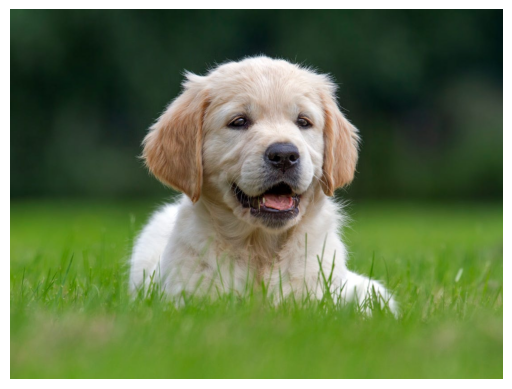

🖼️ Image Caption: a cat sitting on a window sill looking out 
🖼️ Image: cat.jpg
📝 Caption: a cat sitting on a window sill looking out 


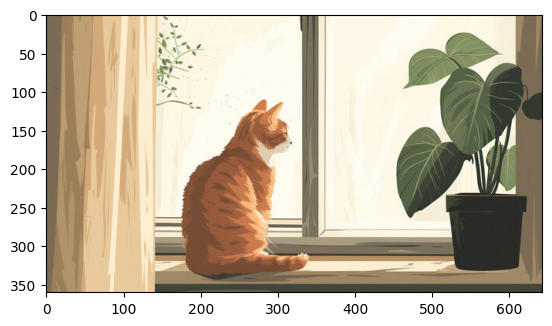

In [11]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tensorflow.keras.applications import efficientnet
from tensorflow.keras.preprocessing import image
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer

# Load pre-trained image captioning model
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
processor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

def load_image(img_path):
    img = Image.open(img_path).convert("RGB")
    return img

def generate_caption(img_path):
    img = load_image(img_path)
    pixel_values = processor(images=img, return_tensors="pt").pixel_values
    output_ids = model.generate(pixel_values, max_length=16)
    caption = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    return caption

# Example image
img_path = "dog.jpg"
caption = generate_caption(img_path)

print("🖼️ Image Caption:", caption)
plt.imshow(load_image(img_path))
plt.axis('off')
plt.show()

img_path = "cat.jpg"
caption = generate_caption(img_path)
print("🖼️ Image Caption:", caption)
plt.imshow(load_image(img_path))
plt.axis('off')
plt.show()

In [9]:
from google.colab import files
uploaded = files.upload()


Saving cat.jpg to cat (2).jpg
